# グローバーのアルゴリズム

このセクションでは、グローバーのアルゴリズムの紹介と、それを使用して非構造化検索の問題を解決する方法を紹介します。 次に、Qiskitを使用して量子アルゴリズムを実装し、シミュレーターとデバイスで実行します。


## 目次

1. [はじめに](#introduction)
2. [例: 2量子ビットの場合](#2qubits)    
   2.1 [シミュレーション](#2qubits-simulation)    
   2.2 [量子デバイス](#2qubits-device)    
3. [例: 3量子ビットの場合](#3qubits)     
   3.1 [シミュレーション](#3qubits-simulation)    
   3.2 [量子デバイス](#3qubits-device)    
4. [演習](#problems)
5. [グローバーのルゴリズムを使って数独を解く](#sudoku)
5. [リファレンス](#references)


## 1. はじめに <a id='introduction'></a>

古典コンピューターを凌駕する量子コンピューターの数あるアドバンテージの１つに、データベース検索を高速に行えるというのを聞いたことがあるかも知れません。Groverのアルゴリズムはこの能力を実証します。Groverのアルゴリズムは、非構造化データの検索問題に対して二次のオーダーの高速化ができるだけではなく、検索問題以外にも利用することができます。つまり、その他様々のアルゴリズムの実行時間を二次のオーダーで改善する一般的なテクニック、もしくはサブルーチンとして利用することができます。これは振幅増幅テクニックと呼ばれています。

### 非構造化データの検索

$N$個の大きなアイテムリストがあるとします。その中で、一つだけアタリ$w$があるとします。リスト内の各アイテムを特定の色のボックスと考えてください。 紫のアタリ$w$を除いて、リスト内のすべてのアイテムが灰色であるとします。

![image1](images/grover_list.png)

紫のアタリの箱（*マークのついたアイテム*）を見つけるためには、古典計算では平均で $N/2$ 個の箱を探す必要があります。 最悪の場合は、$N$ 個探す必要があります。ところが、量子コンピューターでは、グローバーの振幅増幅のテクニックを使って、 おおよそ $\sqrt N$ ステップでマークされたアイテムを探し出すことができます。 二次の高速化は、大きなリスト内のマークされたアイテムを探すためには実際の所、大きな時間の節約になります。 さらに、このアルゴリズムはリスト自体の内部構造を利用しないので、*一般化*することができ、多くの古典の問題でも二次の速度向上をもたらしてくれます。

### オラクルの作成

この教科書の例では、「データベース」は、量子ビットが存在する可能性のあるすべての計算基底の状態で構成されています。例えば、3量子ビットの場合、リストは状態$|000\rangle, |001\rangle, \dots |111\rangle$ です。（つまり、状態$|0\rangle \rightarrow |7\rangle$ です。）

グローバーのアルゴリズムは、解となる状態に負の位相を追加するオラクルを解きます。 つまり 計算基底の任意の状態 $|x\rangle$ において：

$$
U_\omega|x\rangle = \bigg\{
\begin{aligned}
\phantom{-}|x\rangle \quad \text{if} \; x \neq \omega \\
-|x\rangle \quad \text{if} \; x = \omega \\
\end{aligned}
$$

このオラクルは、対角行列になり、マークのついたアイテムに対応する要素は負の位相を持ちます。例えば、3量子ビットで$\omega = \text{101}$のとき、オラクルは以下の行列になります：

$$
U_\omega = 
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{aligned}
\\
\\
\\
\\
\\
\\
\leftarrow \omega = \text{101}\\
\\
\\
\\
\end{aligned}
$$


グローバーのアルゴリズムを非常に強力にしているのは、問題をこの形のオラクルに変換するのがとても簡単だからです。解を _見つける_ のは難しいけれども、解を _検証_ するのは比較的簡単な計算上の問題はたくさんあります。例えば、すべてのルールが満たされていることを確認することで、[数独](https://en.wikipedia.org/wiki/Sudoku)の解を簡単に確認できます。このような問題に対しては、提案された解$x$を取る関数 $f$で、$x$が解でない場合 ($x \neq \omega$)は$f(x) = 0$を返し、正しい解 の場合($x = \omega$)は、$f(x) = 1$を返すような関数を作成できます。このようなオラクルは次のように書くことができます：


$$
U_\omega|x\rangle = (-1)^{f(x)}|x\rangle
$$

そして、このオラクルの行列は対角行列で以下のような形をしています：

$$
U_\omega = 
\begin{bmatrix}
(-1)^{f(0)} &   0         & \cdots &   0         \\
0           & (-1)^{f(1)} & \cdots &   0         \\
\vdots      &   0         & \ddots & \vdots      \\
0           &   0         & \cdots & (-1)^{f(2^n)} \\
\end{bmatrix}
$$

<details>
    <summary>グローバーのオラクルの回路の構築（クリックして展開）</summary>
<p>
古典的な関数$f(x)$がある場合に、以下のような形の可逆な回路に変換できます：
</p><p>
<img alt="A Classical Eeversible Oracle" src="images/grover_boolean_oracle.svg">
</p><p>
「出力」量子ビットを$|{-}\rangle$の状態に初期化すると、位相キックバックにより、これがグローバーのオラクルに変わります（ドイチ・ジョサのオラクルの動作と同じです）：
</p><p>  
<img alt="Grover Oracle Constructed from a Classical Reversible Oracle" src="images/grover_phase_oracle.svg">
</p><p>
補助量子ビット ($|{-}\rangle$)は無視します。
</p>
</details>

この章の次のパートでは、アルゴリズムのコアとなる概念を教えることを目指しています。事前に $\omega$が分かっているオラクルの例を作成するので、これらのオラクルが役立つかどうかを気にする必要はありません。この章の終わりに、ある問題（数独）を解くオラクルを作成する例を取り上げます。

### 振幅増幅

では、アルゴリズムはどのように動作するのでしょう？リストを調べる前は、私たちはマークされたアイテムがどこにあるのか知りません。従って、私たちの推測は、この式で表される均一な重ね合わせ状態での位置特定と大差ありません: $|s \rangle = \frac{1}{\sqrt{N}} \sum_{x = 0}^{N -1} | x
\rangle.$ 

もしこの時点で標準基底 $\{ | x \rangle \}$でこの重ね合わせ状態を測定した場合、5番目の量子法則に従って、 $\frac{1}{N} = \frac{1}{2^n}$の確率で、標準基底のうちの一つに収束します。予想通り、正しい$w$ を当てる確率は$2^n$ のうちの1つです。従って、正しいアイテムを推測するには、平均$N = 2^n$回トライする必要があります。

そこで振幅増幅と呼ばれる処理を加えましょう。この処理により、量子コンピューターが正しいアイテムを見つける確率を大幅に高めることが出来ます。この処理では、マークされたアイテムの振幅を増幅し、その他のアイテムの振幅を小さくします。この結果、最終状態を測定すると、正しいアイテムをほぼ確実に取り出すことができるようになります。

このアルゴリズムには２つの反転という面白い幾何学的解釈があり、２次元平面での回転として表せます。私たちが考慮すべきは、アタリ$| w \rangle$と均一な重ね合わせ状態$| s \rangle$ の２つの特別な状態のみです。この２つのベクトルは、ベクトル空間 $\mathbb{C}^N.$ において、２次元の平面を張ります。$| w \rangle$ 状態は、$N^{-1/2}$ の振幅で重ね合わせ状態に入っているため、これら２つのベクトルは完全に直交しているわけではありません。しかし、$|s \rangle$ から $| w \rangle$  を削除し、正規化し直す事で$| w \rangle$  に直交する追加の状態  $|s'\rangle$ を導入することができます

**Step 1**: 振幅増幅は均一な重ね合わせ状態 $| s \rangle$ から開始します。均一な重ね合わせ状態は、 $| s \rangle = H^{\otimes n} | 0 \rangle^n$により簡単に作成できます。

![image2](images/grover_step1.jpg)


左の図は、$|w\rangle$ と $|s'\rangle$ によって張られる、２次元平面に対応しています。初期状態が$|s\rangle = \sin \theta | w \rangle + \cos \theta | s' \rangle$（ここで$\theta = \arcsin \langle s | w \rangle = \arcsin \frac{1}{\sqrt{N}}$ ）で表されます。
右の図は、$N = 2^2 = 4$の場合の、状態 $| s \rangle$の振幅を表す棒グラフです。振幅の平均値は破線で示されています。

**Step 2**: 反転のオラクル  $U_f$  を状態$|s\rangle$に適用します。

![image3](images/grover_step2.jpg)

幾何学的には、状態 $|s\rangle$  を$|s'\rangle$ に対して反転させることに対応しています。この変換が意味することは、$|w\rangle$の状態の振幅が負の値になるということで、結果として平均振幅が低くなることを意味しています。(訳注：右側のグラフで破線が下がっていることに着目してください）。

**Step 3**: 次に、$|s\rangle$ に対する追加の反転  ($U_s$) を適用します：$U_s = 2|s\rangle\langle s| - \mathbb{1}$. この変換の結果、状態は$U_s U_f| s \rangle$  となり、変換 が完了します。（訳注：右側のグラフでwに対応する振幅が増幅されていることに着目してください）。

![image4](images/grover_step3.jpg)


２つの反転は常に回転と対応しています。$U_s U_f$ による変換は、初期状態 $|s\rangle$ をアタリ$|w\rangle$ に近づけるような回転となります。（訳注：step 3の左側の図を参照)。$U_s$ による反転の効果は、振幅の棒グラフにおいて、平均振幅での反転と解釈できます。最初の反転で平均振幅の値が低くなったので、この変換は、負の振幅をもった $|w\rangle$ をオリジナルの値から大雑把にいって約３倍程度増幅し、他の振幅は小さくします。その後、**step 2** に戻ってこれを繰り返します。アタリ $w$に近くなるまで、この処理を何回か繰り返します。


$t$ 回繰り返した後、状態は $| \psi_t \rangle = (U_s U_f)^t  | s \rangle$に変換されます。


回転を何回適用する必要があるでしょうか？ おおよそ$\sqrt{N}$ 回転で十分なことが分かっています。これは、状態 $| \psi \rangle$ の振幅を調べることで明確になります。$| w \rangle$ の振幅が適用回数と共に線型的（$\sim t N^{-1/2}$）に増えていくことが見てとれます。確率ではなく振幅を扱っているので、ベクトル空間の値には平方根として入ります。そのため、この処理で増幅されるのは、ただの確率ではなく振幅です。

もし解が複数、$M$個ある場合、おおよそ $\sqrt{(N/M)}$ 回転で十分なことが分かっています。


![image5](images/grover_circuit_high_level.png)

## 2. 例: 2量子ビットの場合 <a id='2qubits'></a>

では、 2量子ビットの場合の$N=4$のグローバーのアルゴリズムをみてみましょう。このケースでは、初期状態$|s\rangle$をアタリ$|w\rangle$にするために必要な回転は<b>１回転</b>です[3]:

1. 上の導入に従って、$N=4$ の場合、

   $$\theta = \arcsin \frac{1}{2} = \frac{\pi}{6}.$$

2. $t$ 回の繰り返しの後、以下のようになります。 $$(U_s U_\omega)^t  | s \rangle = \sin \theta_t | \omega \rangle + \cos \theta_t | s' \rangle ,$$ここで $$\theta_t = (2t+1)\theta.$$

3. $| \omega \rangle$を得るためには$\theta_t = \frac{\pi}{2}$である必要があり、よって$\theta=\frac{\pi}{6}$を上記の例に入れると $t=1$となります。つまり、 $t=1$回の回転後に、求めている要素が見つかると言うことです。

次にある特定のオラクルを使った例を示します。

#### $\lvert \omega \rangle = \lvert 11 \rangle$のオラクル

$\lvert w \rangle = \lvert 11 \rangle$の場合を見てみましょう。この場合のオラクル $U_\omega$は以下のように振舞います：

$$U_\omega | s \rangle = U_\omega \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle + |11\rangle \right) = \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle - |11\rangle \right).$$

または:

$$
U_\omega = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end{bmatrix}
$$

これは、制御Zゲートということが分かります。つまり、この例では、オラクルは制御Zゲートのみで作られます：

![image6](images/grover_circuit_2qbuits_oracle_11.svg)

#### 反転 $U_s$

回路を完成させるには、反転$U_s = 2|s\rangle\langle s| - \mathbb{1}$を追加する必要があります。これは$|s\rangle$に関する反転であるため、$|s\rangle$に直交するすべての状態に負の位相を追加します。

これを行う1つの方法は、状態を$|s\rangle \rightarrow |0\rangle$に変換する操作を使用することです。これは、各量子ビットにアダマールゲートを適用することで実装できます。

$$H^{\otimes n}|s\rangle = |0\rangle$$

次に、$|0\rangle$に直行する状態に負の位相を追加する回路を適用します：

$$U_0 \frac{1}{2}\left( \lvert 00 \rangle + \lvert 01 \rangle + \lvert 10 \rangle + \lvert 11 \rangle \right) = \frac{1}{2}\left( \lvert 00 \rangle - \lvert 01 \rangle - \lvert 10 \rangle - \lvert 11 \rangle \right)$$

つまり、$\lvert 00 \rangle$を除いて、各状態の符号が反転します。 簡単に確認するために、$U_0$を実装する1つの方法を以下に示します：

![Circuit for reflection around |0>](images/grover_circuit_2qbuits_reflection_0.svg)

最後に、状態を$|0\rangle \rightarrow |s\rangle$ に変換する操作を実行します（再びHゲートを使います）：

$$H^{\otimes n}U_0 H^{\otimes n} = U_s$$

$U_s$ の回路の完成形は以下のようになります：

![Circuit for reflection around |s>](images/grover_circuit_2qbuits_reflection.svg)


#### $\lvert w \rangle = |11\rangle$の場合の全体の回路
$N=4$の特定のケースでは、必要な回転は１回のみなので、上記のコンポーネントを組み合わせて、$\lvert w \rangle = |11\rangle$の場合のグローバーのアルゴリズムの全体の回路を構築できます：

![image10](images/grover_circuit_2qubits_full_11.svg)

### 2.1 Qiskitでの実装

上記の$\lvert w \rangle = |11\rangle$の場合の２量子ビットの例について、グローバーのアルゴリズムを実装します。

In [1]:
# 初期化
import matplotlib.pyplot as plt
import numpy as np

# Qiskitをインポート
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# 基本的な描画ツールをインポート
from qiskit.visualization import plot_histogram

まず、2量子ビット回路を用意します：

In [2]:
n = 2
grover_circuit = QuantumCircuit(n)

あとは、上記の回路のコマンドを書き出すだけです。 まず、状態を$|s\rangle$に初期化する必要があります。 （任意の数の量子ビットに対して）後で再び使用できるように、一般的な関数を作成しましょう：

In [3]:
def initialize_s(qc, qubits):
    """qcの 'qubits' にH-gate を適用"""
    for q in qubits:
        qc.h(q)
    return qc

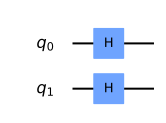

In [4]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw()

$|w\rangle = |11\rangle$のためのオラクルを適用します。 このオラクルは2量子ビットに固有のものです。

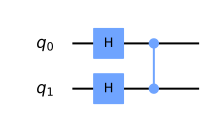

In [5]:
grover_circuit.cz(0,1) # オラクル
grover_circuit.draw()

<span id="general_diffuser"></span>
ここで、Diffuser ( $U_s$ ) を適用します。 $|s\rangle$ に初期化する回路と同様に、後で他の問題で使用できるように、一般的なDiffuser（任意の数の量子ビット用）を作成します。

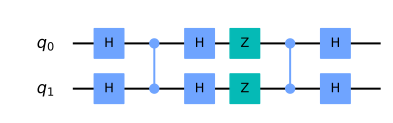

In [6]:
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw()

これで回路が完成しました。

### 2.1.1 シミュレーターでの実験 <a id='2qubits-simulation'></a>

シミュレーションで回路を実行してみましょう。 まず、正しい状態ベクトルかどうかを確認します：

In [7]:
sim = Aer.get_backend('aer_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

予想どおり、$|11\rangle$以外のすべての状態の振幅は0です。これは、$|11\rangle$を測定する可能性が100％であることを意味します：

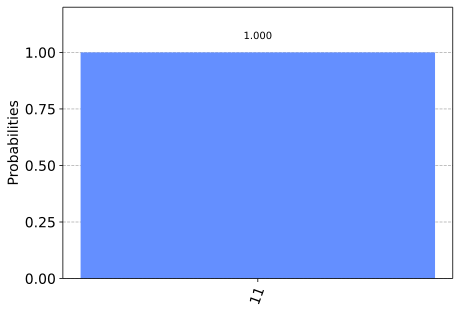

In [8]:
grover_circuit.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

### 2.1.2 実機での実験 <a id='2qubits-device'></a>

実デバイスでは回路を以下のようにして実行します。

In [9]:
# IBM Qアカウントをロードして、最も空いているバックエンドデバイスの情報を得ます。
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

/usr/local/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Running on current least busy device:  ibmq_burlington


In [10]:
#  最も空いているバックエンドで回路を実行します。キュー内のジョブの実行をモニターします。
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


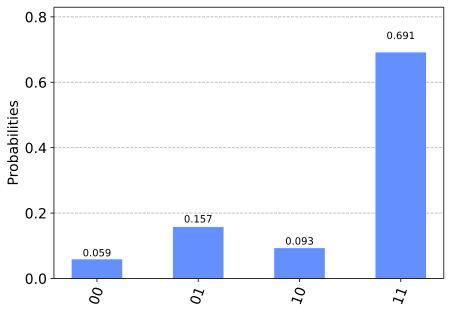

In [11]:
# 計算結果を得ます
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

ほとんどの場合で、状態$|11\rangle$が測定されていることが確認できます。$|11\rangle$以外の結果は、量子計算のエラーによるものです。

## 3. 例：3量子ビットの場合 <a id='3qubits'></a>

3量子ビットのグローバーのアルゴリズムについて、2つのマークされた状態$\lvert101\rangle$と$\lvert110\rangle$を持つ例を参考文献[2]にある実装に従って見ていきます。
フェーズオラクルを使用して問題を解決するための量子回路は次のとおりです：

![image11](images/grover_circuit_3qubits.png)

1. $\lvert000\rangle$で初期化された3量子ビットにアダマールゲートを適用して、均一な重ね合わせを作成します：
   $$\lvert \psi_1 \rangle = \frac{1}{\sqrt{8}} \left( 
   \lvert000\rangle + \lvert001\rangle + \lvert010\rangle + \lvert011\rangle + 
   \lvert100\rangle + \lvert101\rangle + \lvert110\rangle + \lvert111\rangle \right)
   $$

2. $\lvert101\rangle$ と $\lvert110\rangle$にフェーズオラクルを使って印をつけます：
   $$\lvert \psi_2 \rangle = \frac{1}{\sqrt{8}} \left( 
   \lvert000\rangle + \lvert001\rangle + \lvert010\rangle + \lvert011\rangle + 
   \lvert100\rangle - \lvert101\rangle - \lvert110\rangle + \lvert111\rangle \right)
   $$

3. 平均振幅の周りで反転を行います：
   1. アダマールゲートをかけます
      $$
      \lvert \psi_{3a} \rangle = \frac{1}{2} \left( 
      \lvert000\rangle +\lvert011\rangle +\lvert100\rangle -\lvert111\rangle \right)
      $$
   2. Xゲートをかけます
      $$
      \lvert \psi_{3b} \rangle = \frac{1}{2} \left( 
      -\lvert000\rangle +\lvert011\rangle +\lvert100\rangle +\lvert111\rangle \right)
      $$
   3. 制御制御Zをかけます（制御が1,2で標的が3です）
      $$
      \lvert \psi_{3c} \rangle = \frac{1}{2} \left( 
      -\lvert000\rangle +\lvert011\rangle +\lvert100\rangle -\lvert111\rangle \right)
      $$
   4. Xゲートをかけます
      $$
      \lvert \psi_{3d} \rangle = \frac{1}{2} \left( 
      -\lvert000\rangle +\lvert011\rangle +\lvert100\rangle -\lvert111\rangle \right)
      $$
   5. アダマールゲートをかけます
      $$
      \lvert \psi_{3e} \rangle = \frac{1}{\sqrt{2}} \left( 
      -\lvert101\rangle -\lvert110\rangle \right)
      $$

4. $\lvert101\rangle$ と $\lvert110\rangle$の状態を得るために3量子ビットを測定します。

8個の可能性の中に2つの解があるため、1回の反復（ステップ2と3）を実行するだけでよいことに注意してください。

### 3.1 Qiskit での実装 <a id='3qubit-implementation'></a>

では、[上記の例](#3qubits) の$3$量子ビットのグローバーのアルゴリズムを実装し、2つの印のついた状態$\lvert101\rangle$ と $\lvert110\rangle$を検索します。 注：Qiskitは、この文献とは逆の方向に量子ビットを並べるため、回路が水平方向に反転して表示されていることに注意してください。

状態$\lvert101\rangle$ と $\lvert110\rangle$に印をつけるフェーズオラクルを作成します（ステップ1）。

In [12]:
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"

前のセクションでは、2量子ビットに固有のDiffuserを使用しました。下のセルでは、任意の数の量子ビット用の一般的なDiffuserを作成します。

<details>
<summary> 詳細：一般的なDiffuserの作成（クリックして展開）
</summary>

$U_s$を $U_0$から作ることを思い出してください：

$$ U_s = H^{\otimes n} U_0 H^{\otimes n} $$

そして、マルチ制御Zゲート ($MCZ$) は状態$|11\dots 1\rangle$の位相を反転します：

$$
MCZ = 
\begin{bmatrix}
 1 & 0 & 0 & \cdots & 0 \\
 0 & 1 & 0 & \cdots & 0 \\
 \vdots & \vdots & \vdots & \ddots & \vdots \\
 0 & 0 & 0 & \cdots & -1 \\
\end{bmatrix}
\begin{aligned}
\\
\\
\\
\leftarrow \text{Add negative phase to} \; |11\dots 1\rangle\\
\end{aligned}
$$

各量子ビットにXゲートを適用すると、変換が実行されます：

$$
\begin{aligned}
|00\dots 0\rangle & \rightarrow |11\dots 1\rangle\\
|11\dots 1\rangle & \rightarrow |00\dots 0\rangle
\end{aligned}
$$

よって:

$$ U_0 = X^{\otimes n} (MCZ) X^{\otimes n} $$

これらの特性を一緒に使用すると、Hゲート、Xゲート、および単一のマルチ制御Zゲートを使用して𝑈𝑠を作成できます：


$$ U_s = H^{\otimes n} U_0 H^{\otimes n} = H^{\otimes n} X^{\otimes n} (MCZ) X^{\otimes n} H^{\otimes n} $$
    
この回路は-1のグローバル位相を追加することに注意してください。

</details>

In [13]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Hゲートで |s> -> |00..0> に変換
    for qubit in range(nqubits):
        qc.h(qubit)
    # Xゲートで |00..0> -> |11..1> に変換
    for qubit in range(nqubits):
        qc.x(qubit)
    # マルチ制御Zゲートをかけます
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # マルチ制御トフォリ
    qc.h(nqubits-1)
    # |11..1> -> |00..0> に変換
    for qubit in range(nqubits):
        qc.x(qubit)
    # |00..0> -> |s> に変換
    for qubit in range(nqubits):
        qc.h(qubit)
    # Diffuserをゲートにします
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

次に、回路を完成させるために、最初の部分で均一な重ね合わせを作成し、最後の部分で測定を入れます。8つの可能性のうちから2つの解を求めるためがあるため、1回の反復を実行するだけでよいことに注意してください。

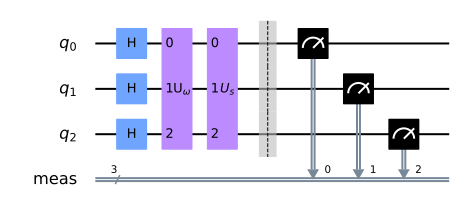

In [14]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw()

### 3.1.1 シミュレーターでの実験 <a id='3qubits-simulation'></a>

上記の回路をシミュレーターで実行します。

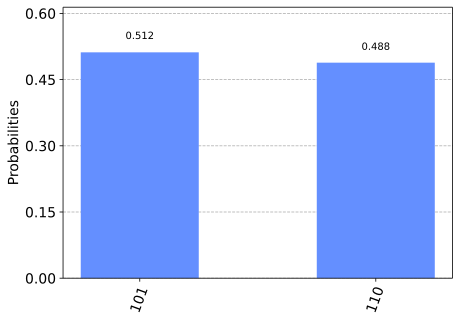

In [15]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

ご覧のとおり、アルゴリズムは印のついた状態 $\lvert101\rangle$と$\lvert110\rangle$を検出します。

### 3.1.2 実デバイスでの実験  <a id='3qubits-device'></a>

実デバイスでは以下のようにして回路を実行できます。

In [17]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_valencia


In [18]:
# 最も空いているバックエンドで回路を実行します。キュー内のジョブの実行をモニターします。
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


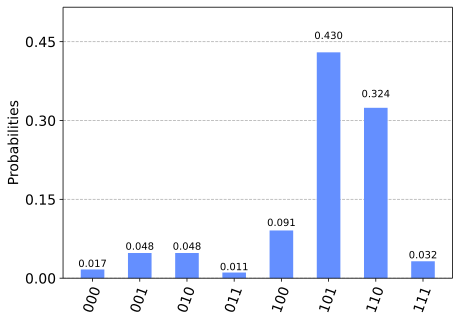

In [19]:
# 計算結果を得ます
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

（うまくいけば）$\lvert101\rangle$ と$\lvert110\rangle$を測定する可能性が高くなります。 他の結果は、量子計算のエラーによるものです。

## 4. 問題 <a id='problems'></a>

以下の関数`grover_problem_oracle`は、複数の量子ビット(`n`)と`variant`を取り、n量子ビットのオラクルを返します。 この関数は、同じ `n` と`variant`に対して常に同じオラクルを返します。 `grover_problem_oracle`を呼び出すときに、`print_solutions = True` を設定すると、各Oracleの解を確認できます。

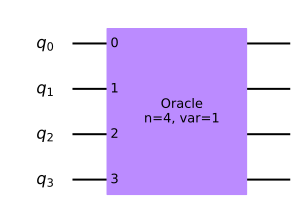

In [20]:
from qiskit_textbook.problems import grover_problem_oracle
## 使用例
n = 4
oracle = grover_problem_oracle(n, variant=1)  # n量子ビットのオラクルの0番目の変数
qc = QuantumCircuit(n)
qc.append(oracle, [0,1,2,3])
qc.draw()

1. `grover_problem_oracle(4, variant=2)` は4量子ビットを使用していて、1つの解を持ちます。<br>
   a. この解を測定する確率が90％を超えるには、何回の反復が必要ですか？  <br>
   b. グローバーのアルゴリズムを使用して、この解となる状態を見つけてください。<br>
   c. 上記の問題1aで計算した反復数をさらに増やすとどうなりますか？それはなぜでしょうか？<br>

2. 2つの解と4つの量子ビットの場合、解を測定する確率が90％を超えるには、何回の反復が必要ですか。 `grover_problem_oracle(4, variant=1)`を使用して回答をテストしてください（2つの解があります）。

3. 以下を入力とする関数`grover_solver(oracle, iterations)` を作成してください：
    - ゲートとしてのグローバーオラクル(`oracle`)
    - 反復の数（整数）(`iterations`)
    
   その際、'`iterations`'の反復を使用して、'`oracle`' ゲートでグローバーのアルゴリズムを実行する `QuantumCircuit` を返すようにしてください。

## 5. グローバーのアルゴリズムで数独を解く <a id="sudoku"></a>

この章でこれまで使われていたオラクルは、事前にその解が分かっているものから作成されています。ここでは、グローバーのアルゴリズムを使用して、事前に解を知らなくても解ける単純な問題を解きます。その問題は2×2のバイナリーの数独で、以下の2つのシンプルなルールに基づいています：

- 同じ値を2回含む列はない
- 同じ値を2回含む行はない

数独の各正方形を次の図のような変数に割り当てて：


![2×2 binary sudoku, with each square allocated to a different variable](images/binary_sudoku.png)

回路にこの数独の解を出力させたいと思います。

グローバーのアルゴリズムを使ってこの問題を解くのは実用的ではありませんが（おそらく頭の中で解決策を見つけることができます！）、この例では、古典的な[決定問題](https://en.wikipedia.org/wiki/Decision_problem)をグローバーのアルゴリズムのオラクルに変換することを示すことが目的です。


### 5.1 問題を回路に変換する

この問題を解くためのオラクルを作成したいと考えています。まず、正しい解を特定する回路を作成します。  [計算の原子](../ch-states/atoms-computation.html) の章で量子回路を使用して古典的な加算器を作成した方法と同様に、可変ビットの状態が有効な解であるかどうかをチェックする _古典的な_ 関数を量子回路上に作成する必要があります。

二つの列と行をそれぞれチェックする必要があるため、チェックすべき条件は4つです：


```
v0 ≠ v1   # 上の行をチェック
v2 ≠ v3   # 下の行をチェック
v0 ≠ v2   # 左の列をチェック
v1 ≠ v3   # 右の列をチェック
```

古典的な（計算基底の）状態を比較していることを忘れないでください。 便宜上、この一連の比較を条項（clause）のlistにまとめます:

In [21]:
clause_list = [[0,1],
               [0,2],
               [1,3],
               [2,3]]

各変数の値を回路のビットに割り当てます。上記の条項を計算でチェックするために、`XOR` ゲートを使用します（`XOR` ゲートは、[計算の原子](../ch-states/atoms-computation.html) の章で学びました）。

In [22]:
def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)

以下の回路の`output0`のビットは、`input0 ≠ input1`の場合にのみ反転することを確認してください：

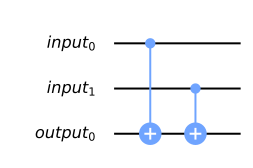

In [23]:
# ビットに名前を付けるために別々のレジスタを使用します
in_qubits = QuantumRegister(2, name='input')
out_qubit = QuantumRegister(1, name='output')
qc = QuantumCircuit(in_qubits, out_qubit)
XOR(qc, in_qubits[0], in_qubits[1], out_qubit)
qc.draw()

この回路は、`input0 == input1` かどうかをチェックし、出力を`output0`に格納します。 各条項をチェックするために、`clause_list`のペアごとにこの回路を繰り返し、出力を新しいビットに格納します：

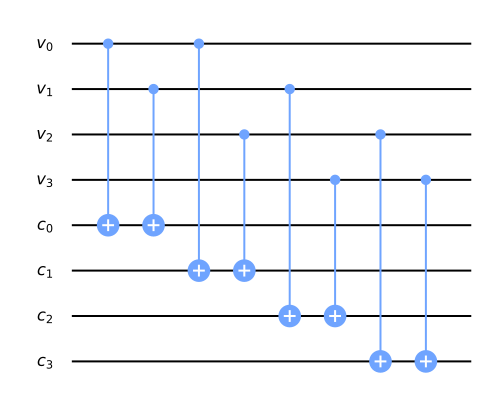

In [24]:
# ビットに名前を付けるために別々のレジスタを作成します
var_qubits = QuantumRegister(4, name='v')  # 変数ビット
clause_qubits = QuantumRegister(4, name='c')  # 条項のチェック結果を格納するビット

# 量子回路の作成
qc = QuantumCircuit(var_qubits, clause_qubits)

# 各条項をチェックするためにXOR ゲートを使います
i = 0
for clause in clause_list:
    XOR(qc, clause[0], clause[1], clause_qubits[i])
    i += 1

qc.draw()

`v0, v1, v2, v3`の割り当てがこの数独の解である場合、ビット`c0, c1, c2, c3`の最終状態はすべて`1`になります。 チェック回路を完了するには、すべての条項が満たされている場合にのみ、1ビットを`1` にする必要があります。このようにして、1ビットだけを調べて、この割り当てが解決策であるかどうかを確認します。これは、マルチコントロール・トフォリゲートを使用して行うことができます。

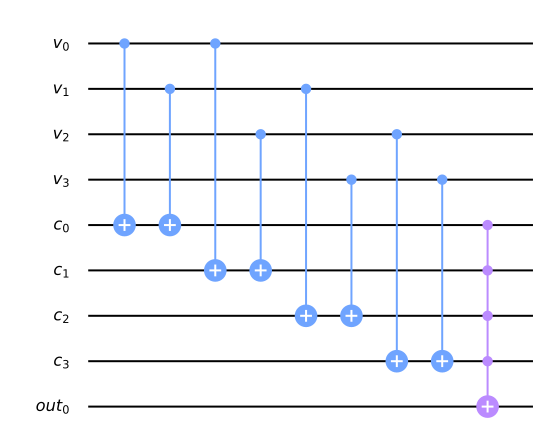

In [25]:
# ビットに名前を付けるために別々のレジスタを作成します
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit)

# 条項（clause）の計算
i = 0
for clause in clause_list:
    XOR(qc, clause[0], clause[1], clause_qubits[i])
    i += 1

# すべての条項が満たされていたら、'output' ビットを反転
qc.mct(clause_qubits, output_qubit)

qc.draw()

上記の回路は、ビット`v0`, `v1`, `v2` および `v3`の初期割り当てを入力として受け取り、他のすべてのビットは`0`に初期化する必要があります。回路の実行後、`out0`ビットの状態は、この割り当てが解決策であるかないかを教えてくれます; `out0 = 0`は、この割り当てが解 _ではない_ ことを意味し、`out0 = 1`は、この割り当てが解 _である_ ことを意味します。

**重要：** この先を読み続ける前に、上記の回路を完全に理解し、上の段落で述べたように機能していることを確認しておいてください。

### 5.2 逆計算、そしてオラクルの完了

位相キックバックを使って、このチェック回路をGroverオラクルに変えることができます。 ここまでを要約すると、3つのレジスターがありました：

- 数独変数（$x = v_3, v_2, v_1, v_0$）を格納するレジスター
- 条項（clause）の結果を格納するレジスター（これは状態$|0000\rangle$で始まり、$|0\rangle$と略します）
- チェック回路の出力を格納する1量子ビット（$|\text{out}_0\rangle$）

オラクルを作成するには、変換を実行するための回路（$U_\omega$）が必要です：

$$
U_\omega|x\rangle|0\rangle|\text{out}_0\rangle = |x\rangle|0\rangle|\text{out}_0\oplus f(x)\rangle
$$

量子ビット`out0`を重ね合わせ状態 $|{-}\rangle$ に設定すると、次のようになります。

$$
\begin{aligned}
U_\omega|x\rangle|0\rangle|{-}\rangle 
&= U_\omega|x\rangle|0\rangle\otimes\tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)\\
&= |x\rangle|0\rangle\otimes\tfrac{1}{\sqrt{2}}(|0\oplus f(x)\rangle - |1\oplus f(x)\rangle)
\end{aligned}
$$

$f(x) = 0$の場合、以下の状態になります：

$$
\begin{aligned}
&= |x\rangle|0\rangle\otimes \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)\\
&= |x\rangle|0\rangle|-\rangle\\
\end{aligned}
$$


（つまり、変更なしです。）しかし、$f(x) = 1$の場合（つまり$x = \omega$の場合）、$|{-}\rangle$の量子ビットに負の位相が導入されます。

$$
\begin{aligned}
&= \phantom{-}|x\rangle|0\rangle\otimes\tfrac{1}{\sqrt{2}}(|1\rangle - |0\rangle)\\
&= \phantom{-}|x\rangle|0\rangle\otimes -\tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)\\
&= -|x\rangle|0\rangle|-\rangle\\
\end{aligned}
$$

これは、状態$|0\rangle|{-}\rangle$に2つの補助レジスターを使用して機能するオラクルです：

$$
U_\omega|x\rangle|0\rangle|{-}\rangle = \Bigg\{
\begin{aligned}
\phantom{-}|x\rangle|0\rangle|-\rangle \quad \text{for} \; x \neq \omega \\
-|x\rangle|0\rangle|-\rangle \quad \text{for} \; x = \omega \\
\end{aligned}
$$

チェック回路をGroverオラクルに適合させるには、2番目のレジスタ（`c`）のビットが計算後に常に状態$|0000\rangle$に戻ることを保証する必要があります。これを行うには、回路の実行後に `c0 = c1 = c2 = c3 = 0`を保証する条項（clause）を計算する回路の部分を繰り返します。このステップを _「逆計算」_ と呼びます。

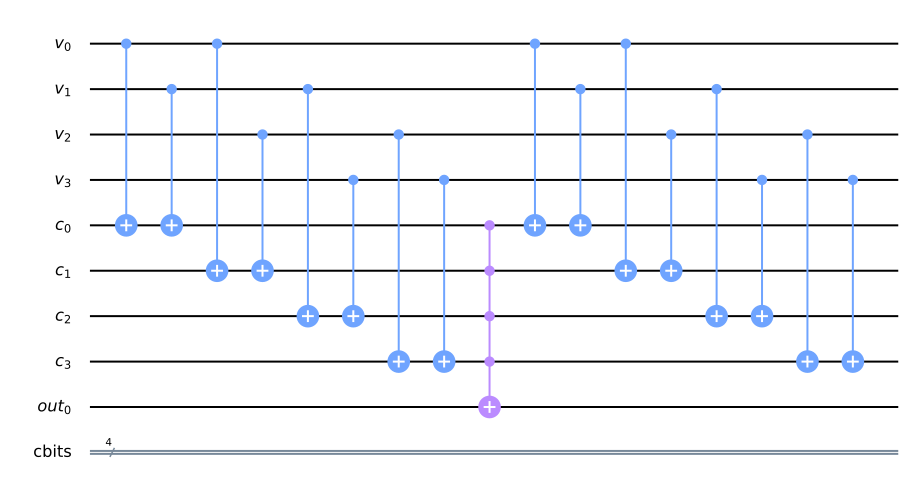

In [26]:
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

def sudoku_oracle(qc, clause_list, clause_qubits):
    # 条項（clause）の計算
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # すべての条項が満たされていたら、'output' ビットを反転
    qc.mct(clause_qubits, output_qubit)

    # 条項を逆計算して条項のチェックビットを0にリセット
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

sudoku_oracle(qc, clause_list, clause_qubits)
qc.draw()

まとめると、上記の回路は以下の内容を実行します：

$$
U_\omega|x\rangle|0\rangle|\text{out}_0\rangle = \Bigg\{
\begin{aligned}
|x\rangle|0\rangle|\text{out}_0\rangle \quad \text{for} \; x \neq \omega \\
|x\rangle|0\rangle\otimes X|\text{out}_0\rangle \quad \text{for} \; x = \omega \\
\end{aligned}
$$

そして、$|\text{out}_0\rangle$の初期状態が$|{-}\rangle$に等しい場合、以下のようになります：

$$
U_\omega|x\rangle|0\rangle|{-}\rangle = \Bigg\{
\begin{aligned}
\phantom{-}|x\rangle|0\rangle|-\rangle \quad \text{for} \; x \neq \omega \\
-|x\rangle|0\rangle|-\rangle \quad \text{for} \; x = \omega \\
\end{aligned}
$$

### 5.3 アルゴリズム全体

このオラクルをグローバーのアルゴリズムに入れます！

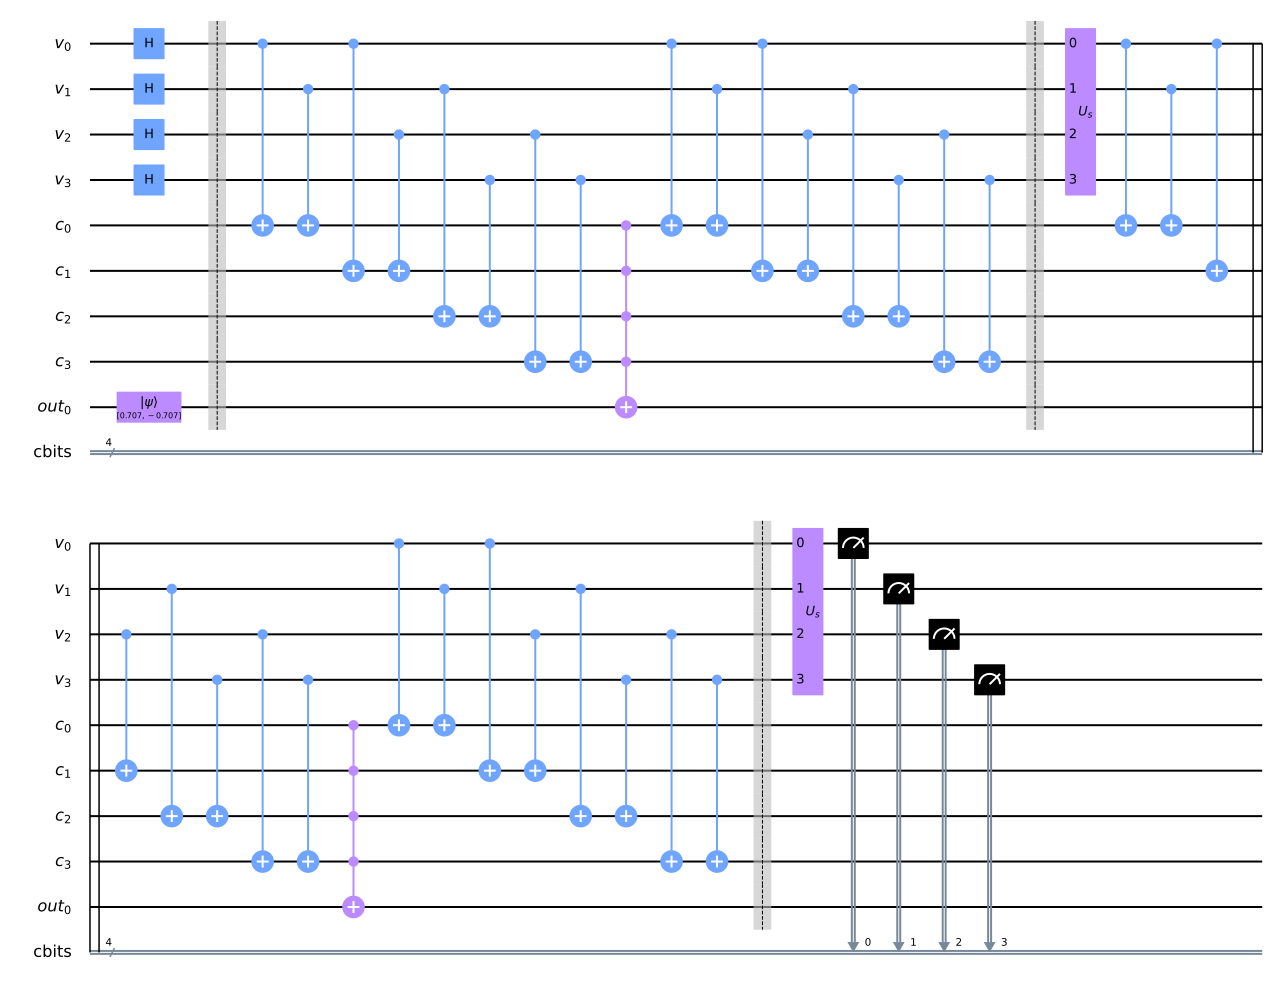

In [27]:
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

# 'out0' を状態 |->に初期化
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# 量子ビットを |s> の状態に初期化
qc.h(var_qubits)
qc.barrier()  # for visual separation

## 最初の反復
# オラクルの適用
sudoku_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# diffuserを適用
qc.append(diffuser(4), [0,1,2,3])

## 2回目の反復
sudoku_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# diffuserを適用
qc.append(diffuser(4), [0,1,2,3])

# 変数の量子ビットを測定
qc.measure(var_qubits, cbits)

qc.draw(fold=-1)

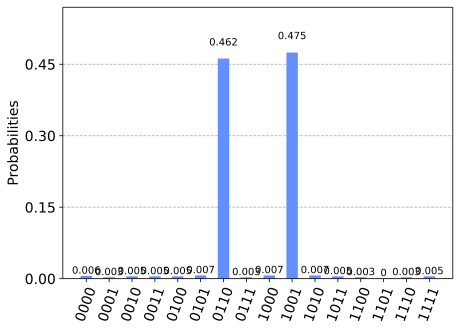

In [28]:
# シミュレーションして結果をプロットします
aer_simulator = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_simulator)
qobj = assemble(transpiled_qc)
result = aer_sim.run(qobj).result()
plot_histogram(result.get_counts())

他のどのビット文字列よりもはるかに高い測定確率を持つ2つのビット文字列、`0110`と`1001`があります。これらは以下の割り当てに対応します：
```
v0 = 0
v1 = 1
v2 = 1
v3 = 0
```
と
```
v0 = 1
v1 = 0
v2 = 0
v3 = 1
```

これが私たちの数独の2つの解です！この章の目的は、実際の問題からGroverオラクルを作成する方法を示すことでした。今回の問題はささいなものでしたが、この問題を解くプロセスは任意の決定問題に適用できます（十分に大きさなサイズの回路を使います）。 以上をまとめると、今回の問題を解く手順は次のとおりです：

1. 正しい解を特定する可逆な古典回路を作成する
2. 位相キックバックと逆計算を使って、この回路をオラクルに変える
3. グローバーのアルゴリズムを使って、このオラクルを解く

## 6. 参考文献 <a id='references'></a>

1. L. K. Grover (1996), "A fast quantum mechanical algorithm for database search", Proceedings of the 28th Annual ACM Symposium on the Theory of Computing (STOC 1996), [doi:10.1145/237814.237866](http://doi.acm.org/10.1145/237814.237866), [arXiv:quant-ph/9605043](https://arxiv.org/abs/quant-ph/9605043)
2. C. Figgatt, D. Maslov, K. A. Landsman, N. M. Linke, S. Debnath & C. Monroe (2017), "Complete 3-Qubit Grover search on a programmable quantum computer", Nature Communications, Vol 8, Art 1918, [doi:10.1038/s41467-017-01904-7](https://doi.org/10.1038/s41467-017-01904-7), [arXiv:1703.10535 ](https://arxiv.org/abs/1703.10535)
3. I. Chuang & M. Nielsen, "Quantum Computation and Quantum Information", Cambridge: Cambridge University Press, 2000.

In [29]:
import qiskit.tools.jupyter
%qiskit_version_table

{'qiskit-terra': '0.15.1',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.20.0'}